In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
df = pd.read_csv(r"C:\Users\tsd95\CSV Files\Heart_disease_statlog.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


<Axes: >

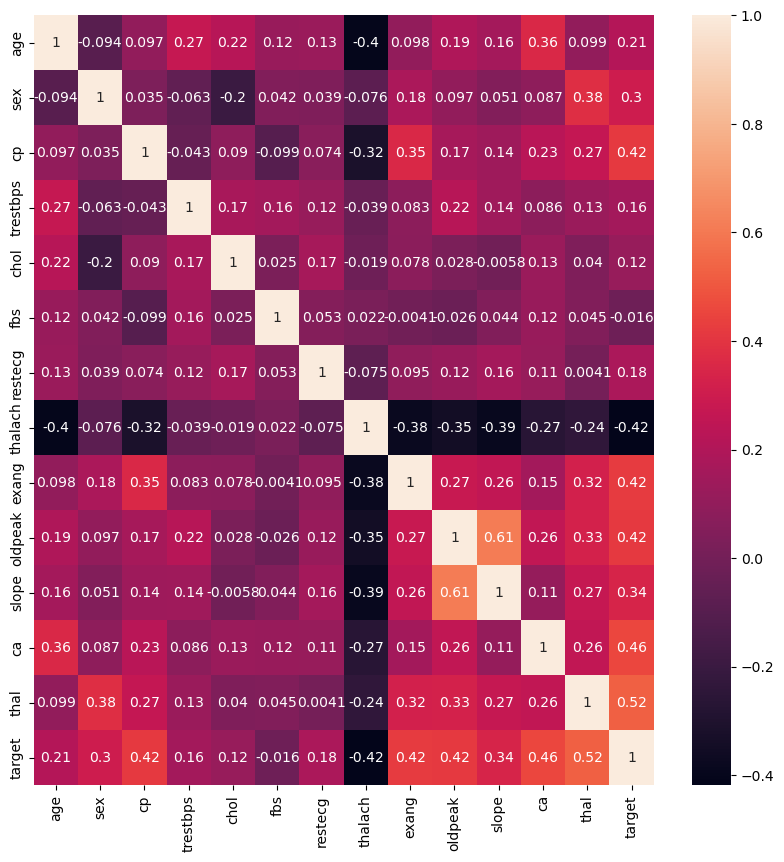

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [7]:
df.drop(columns=[ 'fbs','thalach'],axis=1,inplace=True)

In [9]:
df.sample(5)

,age,sex,cp,trestbps,chol,restecg,exang,oldpeak,slope,ca,thal,target
125,54,0,2,160,201,0,0,0.0,0,1,1,0
188,62,0,3,140,394,2,0,1.2,1,0,1,0
117,56,0,3,200,288,2,1,4.0,2,2,3,1
232,45,1,3,115,260,2,0,0.0,0,0,1,0
7,59,1,3,110,239,2,1,1.2,1,1,3,1


In [10]:
X = df[[col for col in df.columns if col not in ['target']]]

In [11]:
X

,age,sex,cp,trestbps,chol,restecg,exang,oldpeak,slope,ca,thal
0,70,1,3,130,322,2,0,2.4,1,3,1
1,67,0,2,115,564,2,0,1.6,1,0,3
2,57,1,1,124,261,0,0,0.3,0,0,3
3,64,1,3,128,263,0,1,0.2,1,1,3
4,74,0,1,120,269,2,1,0.2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,2,172,199,0,0,0.5,0,0,3
266,44,1,1,120,263,0,0,0.0,0,0,3
267,56,0,1,140,294,2,0,1.3,1,0,1
268,57,1,3,140,192,0,0,0.4,1,0,2


In [12]:
y = df['target']

In [13]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: target, Length: 270, dtype: int64

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [15]:
print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (189, 11)
Shape of X_test (81, 11)
Shape of y_train (189,)
Shape of y_test (81,)


In [16]:
le = LogisticRegression()

In [18]:
model = le.fit(X_train,y_train)

C:\Users\tsd95\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
ypred = model.predict(X_test)

In [22]:
cm = confusion_matrix(y_test,ypred)

In [23]:
cm

array([[38,  6],
       [ 7, 30]], dtype=int64)

In [24]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        44
           1       0.83      0.81      0.82        37

    accuracy                           0.84        81
   macro avg       0.84      0.84      0.84        81
weighted avg       0.84      0.84      0.84        81

